# 01. Exploratory Data Analysis (EDA)

This notebook explores the **processed** Airbnb listings data (`listings.parquet`) to understand distributions, trends, and relationships.

**Goals:**
1. Visualize key metrics and distributions.
2. Analyze price patterns (overall, temporal, geospatial).
3. Examine review scores.
4. Identify correlations between features.
5. Generate initial insights to inform feature engineering and modeling. 💡

## 1. Setup & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
import warnings
%matplotlib inline
# Settings
plt.style.use('ggplot') # Using ggplot style for cleaner plots
sns.set_palette('viridis') # Set a nice default color palette
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

# Define file path (relative to notebooks/ folder)
DATA_PATH = Path("../data/processed/listings.parquet")

In [19]:
# Load the processed data
print(f"Attempting to load data from: {DATA_PATH.resolve()}")
try:
    df = pd.read_parquet(DATA_PATH)
    print(f"✅ Successfully loaded data. Shape: {df.shape}")
    # Convert key date columns right away
    date_cols = ['host_since', 'first_review', 'last_review']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
        else:
            print(f"Warning: Date column '{col}' not found.")
    # Ensure price is numeric
    if 'price' in df.columns:
        df['price'] = pd.to_numeric(df['price'], errors='coerce')
    else:
        print("Warning: 'price' column not found.")
    
    display(df.head())
except FileNotFoundError:
    print(f"❌ Error: File not found at {DATA_PATH.resolve()}. Please ensure the path is correct and the preprocessing script ran.")
    df = None
except Exception as e:
    print(f"❌ An unexpected error occurred during loading: {e}")
    df = None

Attempting to load data from: /workspaces/Smart-Stays/data/processed/listings.parquet
✅ Successfully loaded data. Shape: (15188, 83)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,reviews_per_month_imputed,days_since_last_review,days_since_last_review_imputed,num_amenities
0,5456.0,https://www.airbnb.com/rooms/5456,20250613040113,2025-06-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028.0,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, TX",I am a licensed Real Estate Broker and owner o...,within a few hours,100%,92%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,2.0,"['email', 'phone']",t,t,Neighborhood highlights,78702.0,NaN,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3.0,1.0,1 bath,1.0,2.0,"[""Extra pillows and blankets"", ""Wifi"", ""Luggag...",101.0,2,90.0,2.0,2.0,90.0,90.0,2.0,90.0,None,t,30.0,60.0,90.0,336.0,2025-06-13,711.0,27.0,0.0,185,33.0,162.0,16362.0,2009-03-08,2025-04-27,4.85,4.88,4.86,4.90,4.82,4.73,4.79,NaN,f,1.0,1.0,0.0,0.0,3.59,0.0,47.0,0.0,30.0
1,5769.0,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,None,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186.0,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, TX",We're easygoing professionals that enjoy meeti...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/8186/profile_...,https://a0.muscache.com/im/users/8186/profile_...,SW Williamson Co.,1.0,4.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,78729.0,NaN,30.45697,-97.78422,Private room in home,Private room,2.0,1.0,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Wifi"", ""Hair d...",45.0,1,14.0,1.0,1.0,14.0,14.0,1.0,14.0,None,t,4.0,4.0,4.0,4.0,2025-06-13,304.0,5.0,3.0,4,5.0,30.0,1350.0,2010-04-10,2025-06-08,4.91,4.91,4.87,4.91,4.94,4.77,4.92,NaN,f,1.0,0.0,1.0,0.0,1.65,0.0,5.0,0.0,38.0
2,6413.0,https://www.airbnb.com/rooms/6413,20250613040113,2025-06-14,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879.0,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, TX","We're a young family that likes to travel, we ...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/4f35e...,https://a0.muscache.com/im/pictures/user/4f35e...,Travis Heights,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,78704.0,NaN,30.24885,-97.73

## 2. High-Level Metrics & Distributions

Total number of listings: 15,188


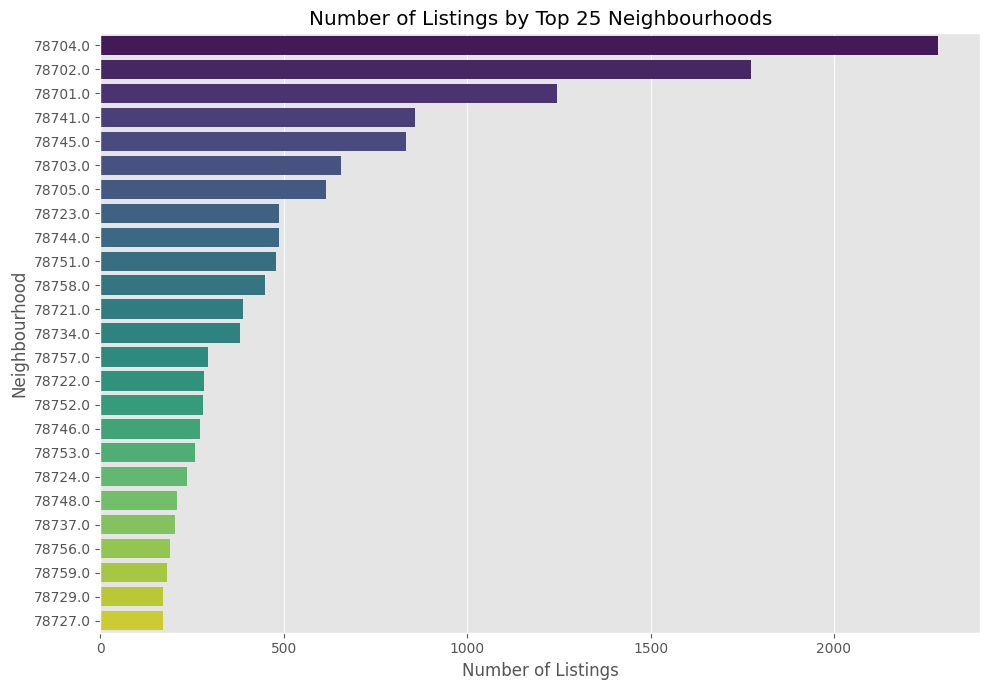

In [20]:
if df is not None:
    # Number of listings
    print(f'Total number of listings: {len(df):,}')
    
    # Distribution by neighbourhood
    if 'neighbourhood_cleansed' in df.columns:
        plt.figure(figsize=(10, 7)) # Adjusted size slightly
        # Limit to top 25 for better readability
        top_neighbourhoods = df['neighbourhood_cleansed'].value_counts().nlargest(25).index
        sns.countplot(y='neighbourhood_cleansed', data=df[df['neighbourhood_cleansed'].isin(top_neighbourhoods)], 
                      order=top_neighbourhoods, palette='viridis')
        plt.title('Number of Listings by Top 25 Neighbourhoods')
        plt.xlabel('Number of Listings')
        plt.ylabel('Neighbourhood')
        plt.tight_layout()
        plt.show()
    else:
        print("'neighbourhood_cleansed' column not found.")
else:
    print("DataFrame not loaded.")

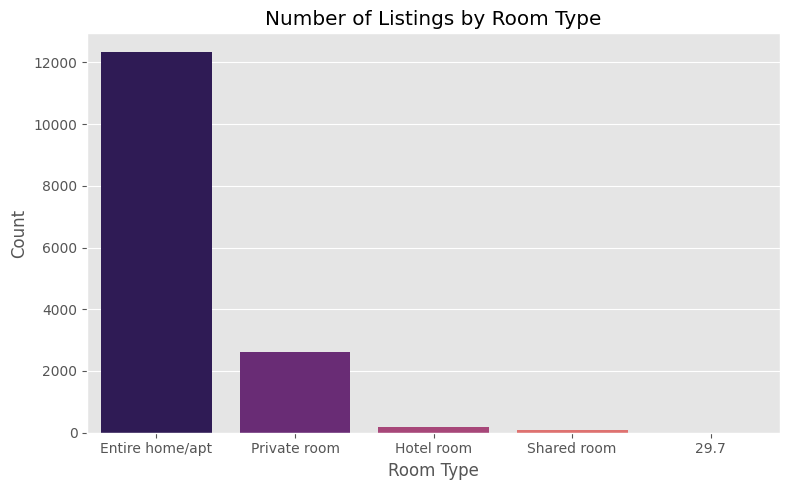

In [21]:
if df is not None:
    # Distribution by room type
    if 'room_type' in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index, palette='magma')
        plt.title('Number of Listings by Room Type')
        plt.xlabel('Room Type')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
    else:
        print("'room_type' column not found.")
else:
    print("DataFrame not loaded.")

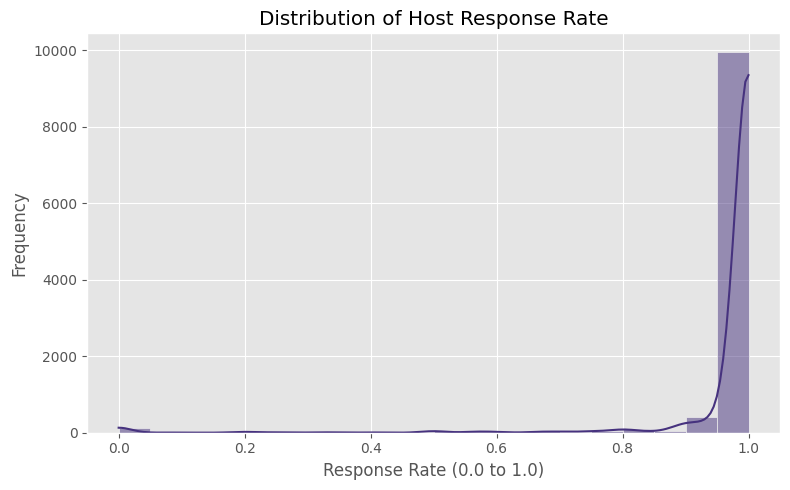

In [22]:
if df is not None:
    # Distribution by host response rate (ensure it's numeric)
    if 'host_response_rate' in df.columns:
        try:
            if df['host_response_rate'].dtype == 'object':
                host_response_rate_numeric = df['host_response_rate'].str.replace('%', '', regex=False).astype(float) / 100.0
            else:
                host_response_rate_numeric = df['host_response_rate'].astype(float)
            
            plt.figure(figsize=(8, 5))
            sns.histplot(host_response_rate_numeric.dropna(), bins=20, kde=True)
            plt.title('Distribution of Host Response Rate')
            plt.xlabel('Response Rate (0.0 to 1.0)')
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Could not process 'host_response_rate': {e}")
    else:
        print("'host_response_rate' column not found.")
else:
    print("DataFrame not loaded.")

## 3. Price Analysis 💰

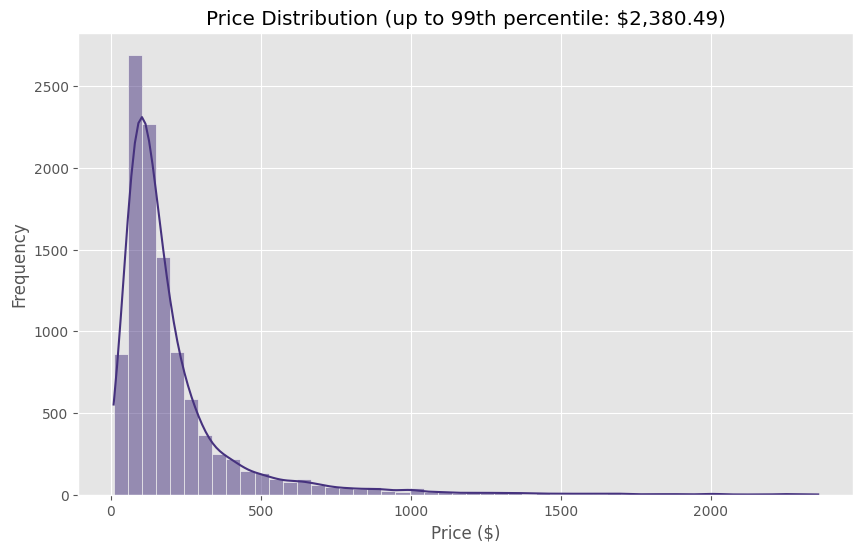

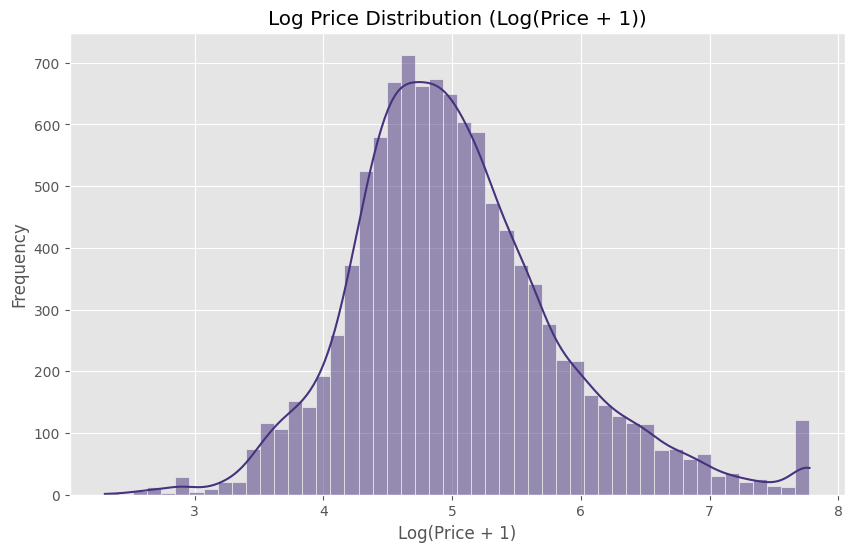

In [23]:
if df is not None and 'price' in df.columns:
    # Drop rows where price might be NaN after conversion
    df_price_cleaned = df.dropna(subset=['price'])
    
    if not df_price_cleaned.empty:
        # Price distribution histogram
        plt.figure(figsize=(10, 6))
        # Plotting only up to 99th percentile for better visualization
        price_limit = df_price_cleaned['price'].quantile(0.99)
        sns.histplot(df_price_cleaned[df_price_cleaned['price'] <= price_limit]['price'], bins=50, kde=True)
        plt.title(f'Price Distribution (up to 99th percentile: ${price_limit:,.2f})')
        plt.xlabel('Price ($)')
        plt.ylabel('Frequency')
        plt.show()

        # Price distribution on a log scale (log1p handles zero)
        plt.figure(figsize=(10, 6))
        df_price_cleaned['price_log1p'] = np.log1p(df_price_cleaned['price'])
        sns.histplot(df_price_cleaned['price_log1p'], bins=50, kde=True)
        plt.title('Log Price Distribution (Log(Price + 1))')
        plt.xlabel('Log(Price + 1)')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("No valid price data to plot after cleaning.")
else:
    print("DataFrame not loaded or 'price' column missing.")

## 4. Temporal Patterns 📅

*Using `last_review` date as a proxy for seasonality.*

In [24]:
if df is not None:
    # Prepare data for temporal plots
    required_cols_temporal = ['price', 'last_review', 'availability_365']
    if all(col in df.columns for col in required_cols_temporal):
        # Ensure price is numeric and drop NaNs for key columns
        df['price'] = pd.to_numeric(df['price'], errors='coerce') 
        df_temporal = df.dropna(subset=required_cols_temporal).copy() 
        print(f"Using {len(df_temporal):,} rows for temporal analysis.")
    else:
        print("Missing required columns for temporal analysis ('price', 'last_review', 'availability_365').")
        df_temporal = pd.DataFrame()
else:
    print("DataFrame not loaded.")
    df_temporal = pd.DataFrame()

Using 9,194 rows for temporal analysis.


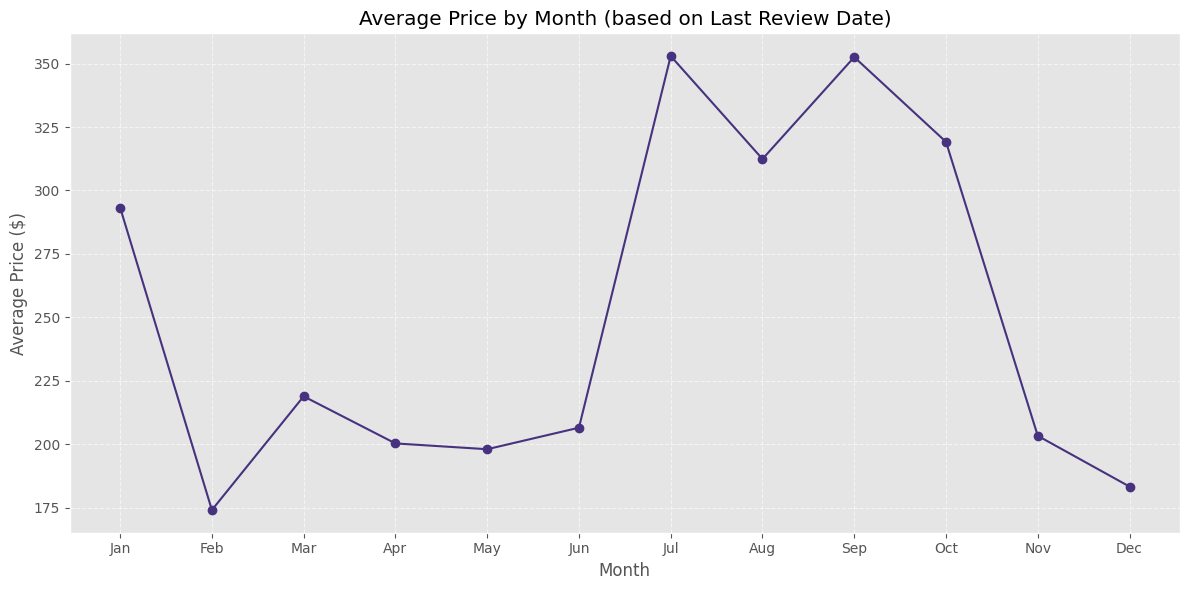

In [25]:
# Price seasonality by month
if not df_temporal.empty:
    df_temporal['month'] = df_temporal['last_review'].dt.month
    monthly_avg_price = df_temporal.groupby('month')['price'].mean()
    
    plt.figure(figsize=(12, 6))
    monthly_avg_price.plot(kind='line', marker='o')
    plt.title('Average Price by Month (based on Last Review Date)')
    plt.xlabel('Month')
    plt.ylabel('Average Price ($)')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data to plot monthly price seasonality.")

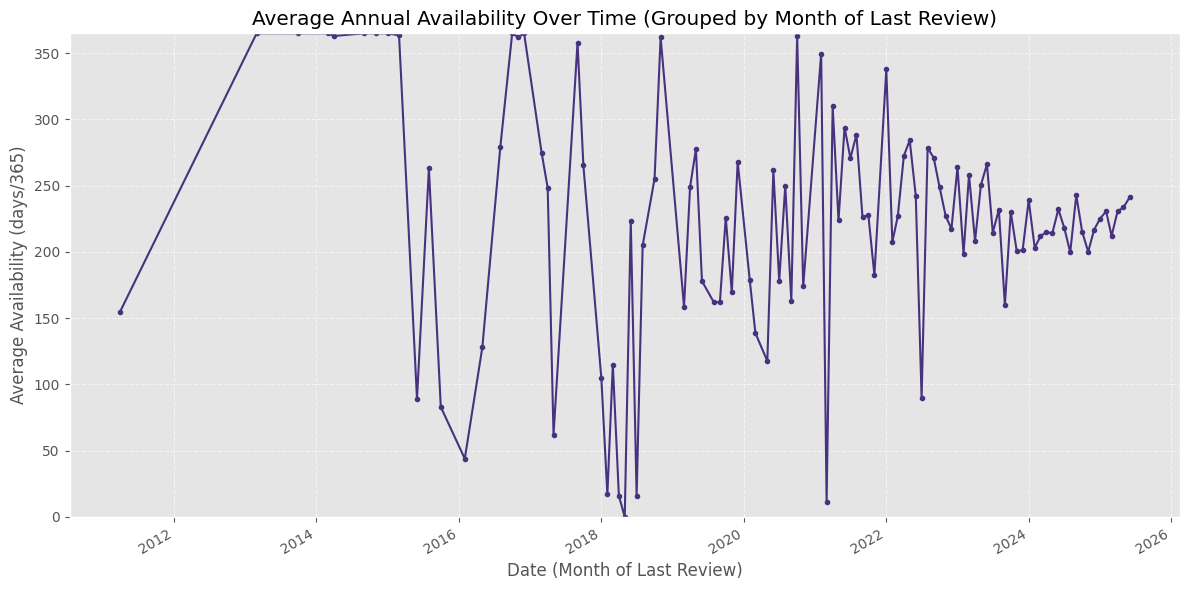

In [26]:
# Average availability over time
if not df_temporal.empty:
    plt.figure(figsize=(12, 6))
    try:
        # Group by year-month for a smoother trend line
        availability_trend = df_temporal.groupby(df_temporal['last_review'].dt.to_period('M'))['availability_365'].mean()
        # Ensure the index is timestamp for plotting
        availability_trend.index = availability_trend.index.to_timestamp()
        
        availability_trend.plot(kind='line', marker='.')
        plt.title('Average Annual Availability Over Time (Grouped by Month of Last Review)')
        plt.xlabel('Date (Month of Last Review)')
        plt.ylabel('Average Availability (days/365)')
        plt.ylim(0, 365) 
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not plot availability trend: {e}")
else:
    print("Not enough data to plot availability trend.")

## 5. Geospatial Analysis 🗺️

In [27]:
if df is not None:
    # Prepare data for geo plots
    required_cols_geo = ['latitude', 'longitude', 'price', 'id', 'neighbourhood_cleansed', 'room_type']
    hover_name_col = 'id' if 'id' in df.columns else df.index 
    
    if all(col in df.columns for col in required_cols_geo):
        # Ensure coords and price are numeric, drop NaNs
        df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
        df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
        df['price'] = pd.to_numeric(df['price'], errors='coerce')
        df_geo = df.dropna(subset=['latitude', 'longitude', 'price']).copy()
        print(f"Using {len(df_geo):,} rows for geospatial analysis.")
    else:
        print("Missing required columns for geospatial analysis.")
        df_geo = pd.DataFrame()
else:
    print("DataFrame not loaded.")
    df_geo = pd.DataFrame()

Using 10,708 rows for geospatial analysis.


In [28]:
# Density map using Plotly
if not df_geo.empty:
    print("Generating Density Map...")
    try:
        fig_density = px.density_mapbox(df_geo,
                                        lat='latitude', lon='longitude', radius=8, # Slightly smaller radius
                                        center=dict(lat=df_geo.latitude.median(), lon=df_geo.longitude.median()), zoom=10,
                                        mapbox_style="carto-positron", # Using a lighter base map
                                        opacity=0.5)
        fig_density.update_layout(title='Listing Density Map', margin={"r":0,"t":40,"l":0,"b":0})
        fig_density.show()
    except Exception as e:
        print(f"Could not generate density map: {e}")
else:
    print("Skipping density map due to missing data.")

Generating Density Map...


In [29]:
# Price scatter map using Plotly
if not df_geo.empty:
    print("Generating Price Scatter Map...")
    try:
        # Use a sample for performance
        map_sample_df = df_geo.sample(min(len(df_geo), 7000), random_state=42) 
        # Use log price for better color scale if price is skewed
        map_sample_df['price_log1p'] = np.log1p(map_sample_df['price'])
        
        fig_scatter = px.scatter_mapbox(map_sample_df, 
                                        lat='latitude', lon='longitude', 
                                        color='price_log1p', # Color by log price
                                        size='price', # Size still by original price for emphasis
                                        color_continuous_scale=px.colors.sequential.Viridis, # Different color scale
                                        size_max=15, zoom=10,
                                        center=dict(lat=df_geo.latitude.median(), lon=df_geo.longitude.median()),
                                        mapbox_style="carto-positron",
                                        hover_name=hover_name_col, 
                                        hover_data={'neighbourhood_cleansed': True, 'price': ':.2f', 'room_type': True, 'latitude':False, 'longitude':False, 'price_log1p':False}, # Custom hover data
                                        opacity=0.6)
        fig_scatter.update_layout(title='Listing Log-Price Distribution on Map', coloraxis_colorbar_title='Log(Price+1)',
                                  margin={"r":0,"t":40,"l":0,"b":0})
        fig_scatter.show()
    except Exception as e:
        print(f"Could not generate scatter map: {e}")
else:
    print("Skipping scatter map due to missing data.")

Generating Price Scatter Map...


## 6. Review Scores Analysis ⭐

In [30]:
if df is not None:
    # Prepare data for review score plots
    required_cols_reviews = ['review_scores_rating']
    if all(col in df.columns for col in required_cols_reviews):
        df_reviews = df.copy()
        # Ensure score is numeric
        df_reviews['review_scores_rating'] = pd.to_numeric(df_reviews['review_scores_rating'], errors='coerce')
        df_reviews.dropna(subset=required_cols_reviews, inplace=True)
        print(f"Using {len(df_reviews):,} rows for review score analysis.")
    else:
        print("Missing 'review_scores_rating' column for analysis.")
        df_reviews = pd.DataFrame()
else:
     print("DataFrame not loaded.")
     df_reviews = pd.DataFrame()

Using 12,276 rows for review score analysis.


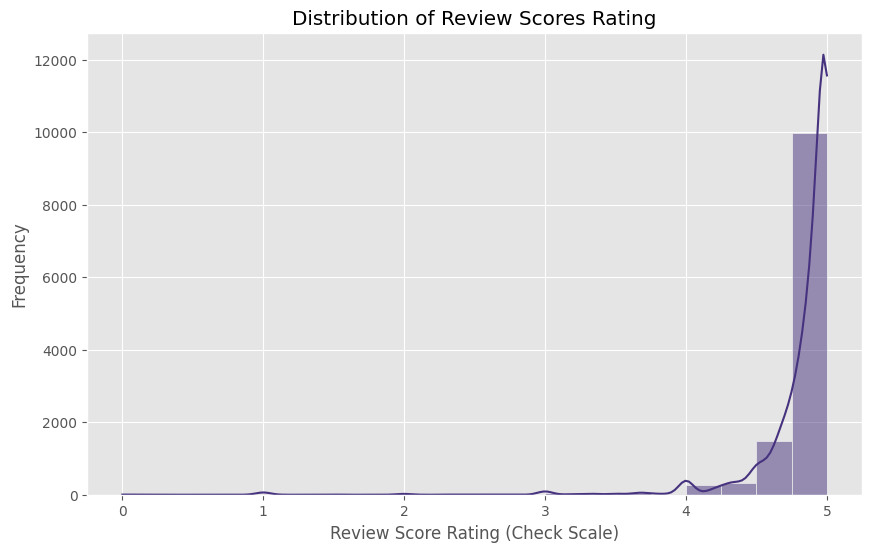

In [31]:
if not df_reviews.empty:
    # Rating distribution histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df_reviews['review_scores_rating'], bins=20, kde=True)
    # Assuming the scale might be 0-100 based on some datasets
    # Adjust xlabel if your scale is different (e.g., 0-5)
    plt.title('Distribution of Review Scores Rating')
    plt.xlabel('Review Score Rating (Check Scale)') 
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No valid review score data available to plot.")

## 7. Price vs. Categorical Features (Box/Violin Plots)

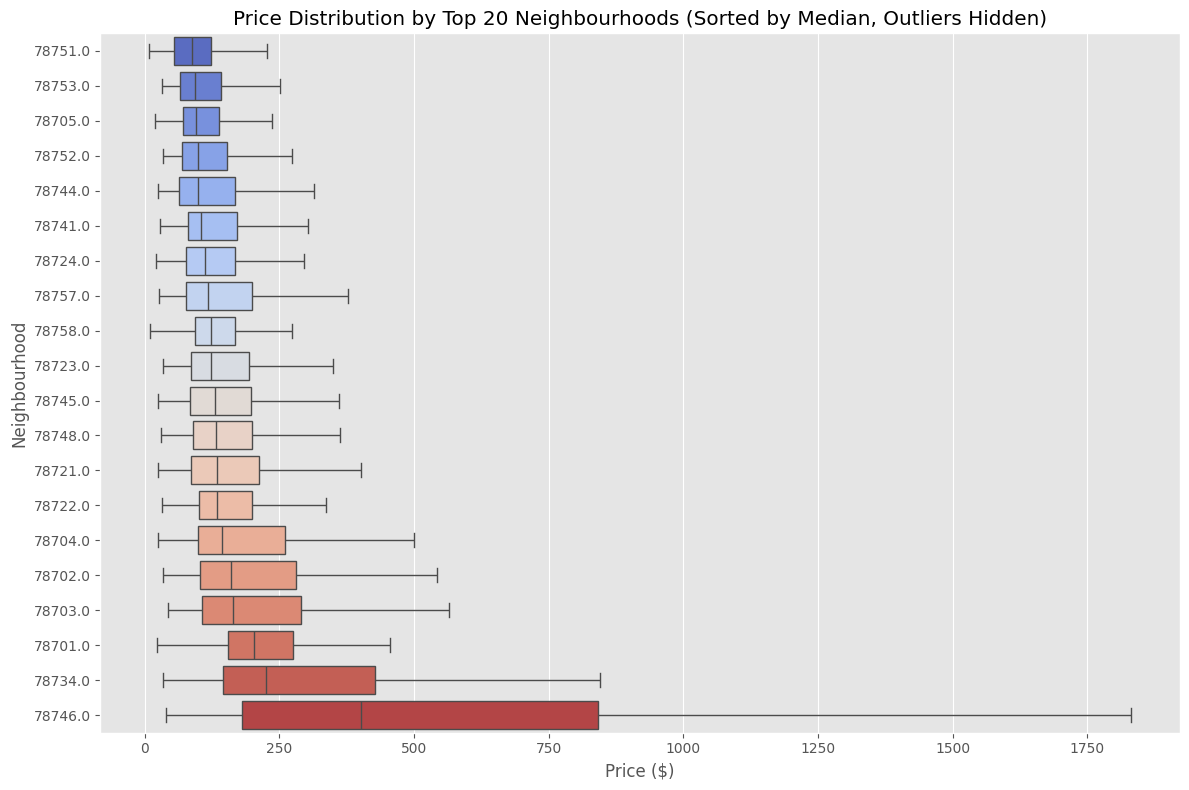

In [32]:
# Boxplots for price by top neighbourhoods (Corrected Version)
if df is not None and 'neighbourhood_cleansed' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(12, 8))
    
    df_cleaned_for_plot = df.dropna(subset=['price', 'neighbourhood_cleansed'])
    top_neighbourhoods = df['neighbourhood_cleansed'].value_counts().nlargest(20).index
    plot_data = df_cleaned_for_plot[df_cleaned_for_plot['neighbourhood_cleansed'].isin(top_neighbourhoods)].copy()
    plot_data['neighbourhood_cleansed'] = plot_data['neighbourhood_cleansed'].astype(str)
    final_order = [str(hood) for hood in top_neighbourhoods if str(hood) in plot_data['neighbourhood_cleansed'].unique()]
    
    if not plot_data.empty and final_order:
        # Calculate median prices for sorting
        median_prices = plot_data.groupby('neighbourhood_cleansed')['price'].median().sort_values()
        sorted_order = median_prices.index.tolist()
        # Ensure final_order only contains elements present after filtering AND sorting
        final_sorted_order = [hood for hood in sorted_order if hood in final_order]
        
        if final_sorted_order:
            sns.boxplot(y='neighbourhood_cleansed', x='price', data=plot_data, 
                        order=final_sorted_order, # Sort by median price
                        palette='coolwarm', 
                        showfliers=False) # Hide extreme outliers 
            plt.title('Price Distribution by Top 20 Neighbourhoods (Sorted by Median, Outliers Hidden)')
            plt.xlabel('Price ($)')
            plt.ylabel('Neighbourhood')
            plt.tight_layout()
            plt.show()
        else:
            print("No neighbourhoods left after sorting/filtering for boxplot.")
    else:
        print("No valid data available to plot neighbourhood boxplot.")
else:
    print("DataFrame not loaded or required columns missing for neighbourhood boxplot.")

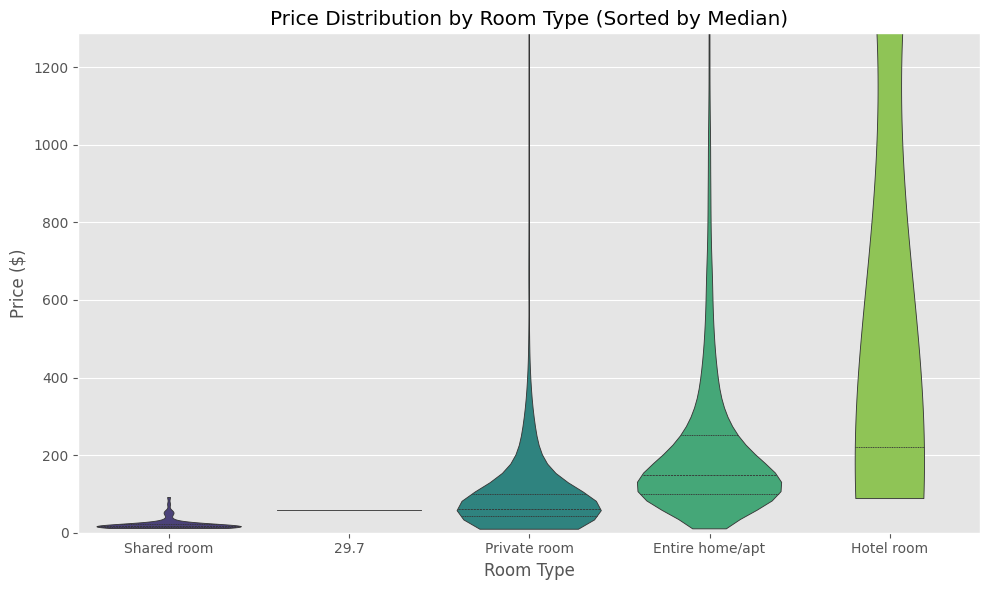

In [33]:
# Violin plots for price by room type (Corrected Version)
if df is not None and 'room_type' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(10, 6))
    
    plot_data_violin = df.dropna(subset=['price', 'room_type']).copy()
    plot_data_violin['room_type'] = plot_data_violin['room_type'].astype(str)

    if not plot_data_violin.empty:
        try:
            # Calculate order based on median price per room type
            median_prices_room = plot_data_violin.groupby('room_type')['price'].median().sort_values().index
            
            sns.violinplot(
                x='room_type',
                y='price',
                data=plot_data_violin,
                order=median_prices_room, # Sort violins by median price
                palette='viridis',
                cut=0,             
                inner='quartile' # Show quartiles inside violins
            )
            plt.title('Price Distribution by Room Type (Sorted by Median)') 
            plt.xlabel('Room Type')
            plt.ylabel('Price ($)')
            # Limit y-axis to focus on the main distribution (e.g., 98th percentile)
            price_limit_violin = plot_data_violin['price'].quantile(0.98)
            plt.ylim(0, price_limit_violin) 
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"An error occurred during plotting violin plot: {e}")
    else:
        print("No valid data available for violin plot.")
else:
     print("DataFrame not loaded or required columns missing for violin plot.")

## 8. Feature Relationships (Correlation) 🔗

Calculating correlation for 42 numeric columns.


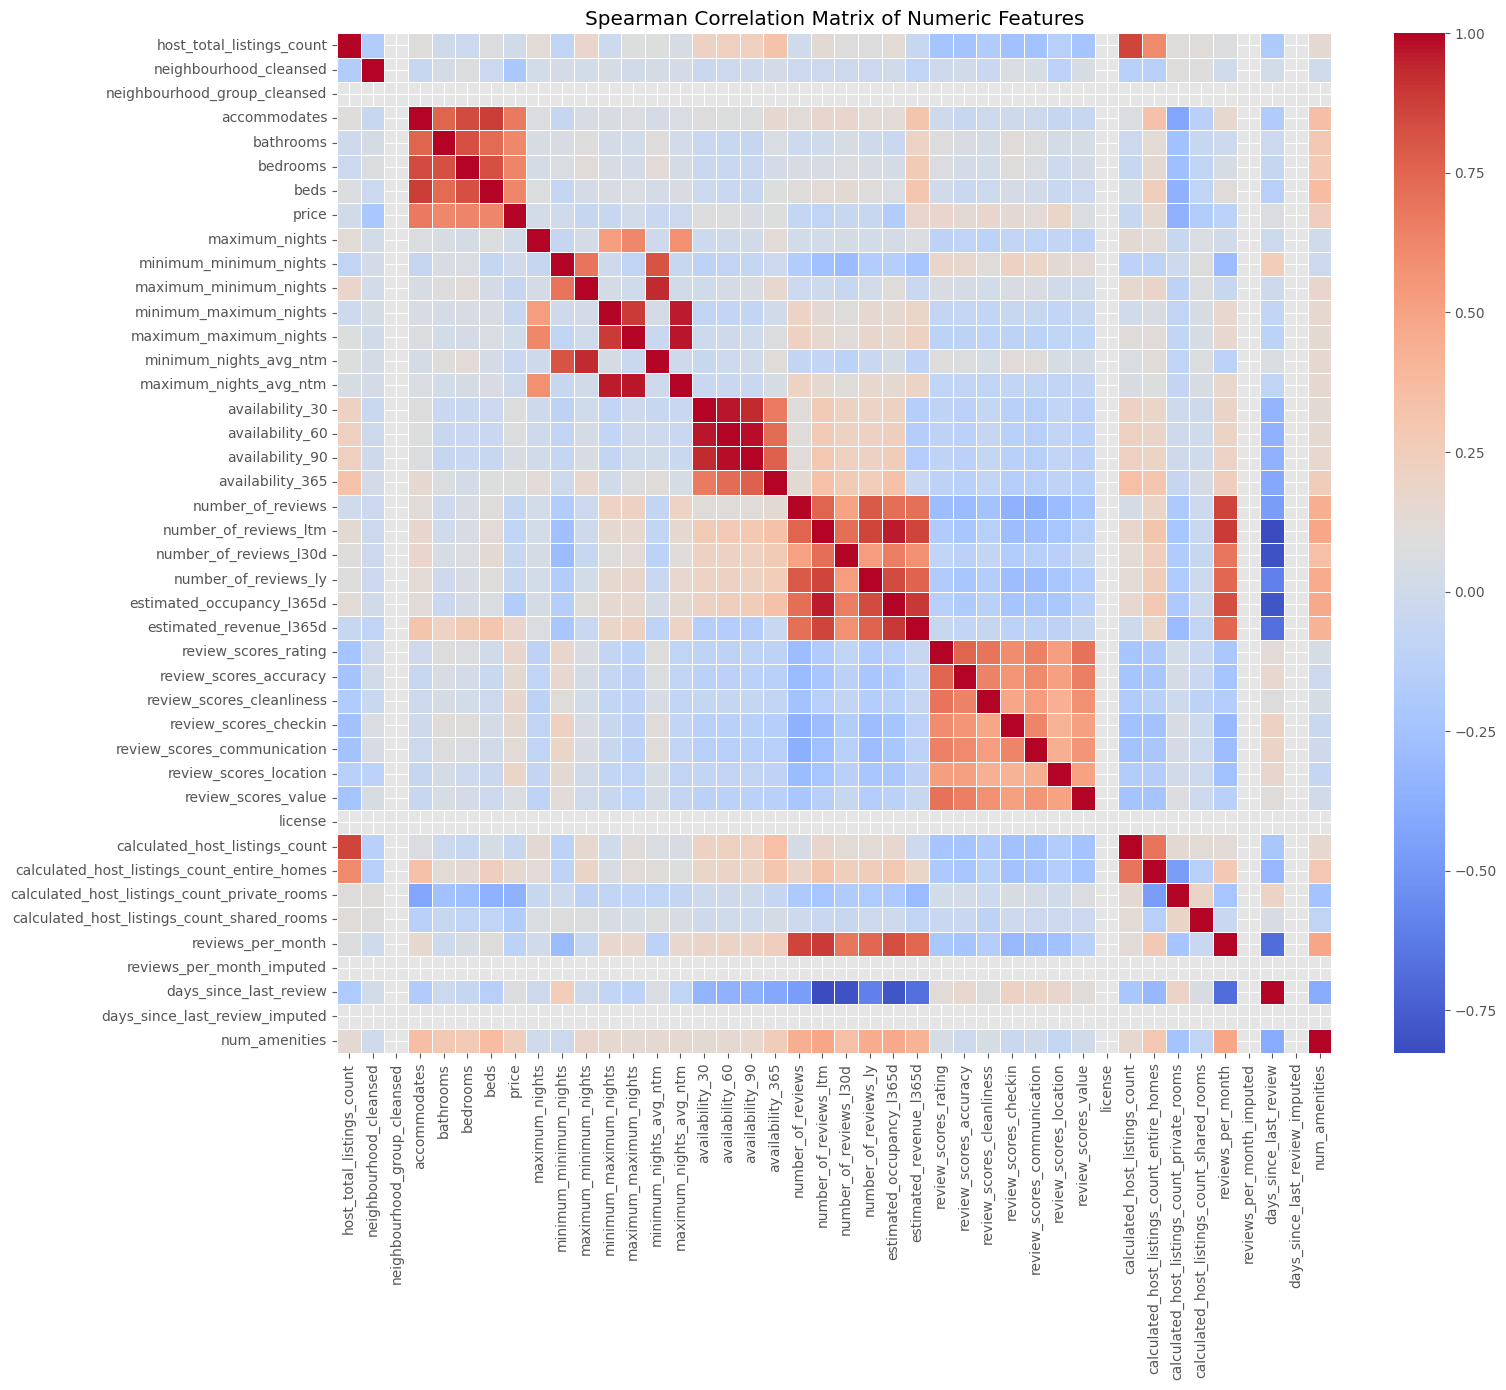


--- Top 20 Correlations with Price (Spearman) ---


accommodates                                   0.672140
bedrooms                                       0.631451
beds                                           0.626087
bathrooms                                      0.617047
num_amenities                                  0.241272
review_scores_location                         0.180497
estimated_revenue_l365d                        0.179525
review_scores_rating                           0.175420
review_scores_cleanliness                      0.169922
calculated_host_listings_count_entire_homes    0.150092
review_scores_checkin                          0.142222
review_scores_accuracy                         0.130922
review_scores_communication                    0.120363
availability_30                                0.089929
availability_365                               0.080837
availability_60                                0.075375
days_since_last_review                         0.071719
review_scores_value                            0


--- Bottom 20 Correlations with Price (Spearman) ---


host_total_listings_count                       0.003747
minimum_minimum_nights                         -0.004977
maximum_nights_avg_ntm                         -0.027034
minimum_nights_avg_ntm                         -0.048070
calculated_host_listings_count                 -0.049275
number_of_reviews_l30d                         -0.050364
minimum_maximum_nights                         -0.052788
number_of_reviews_ly                           -0.053002
maximum_minimum_nights                         -0.058399
number_of_reviews                              -0.063020
number_of_reviews_ltm                          -0.097034
reviews_per_month                              -0.119739
calculated_host_listings_count_shared_rooms    -0.166855
estimated_occupancy_l365d                      -0.170285
neighbourhood_cleansed                         -0.211203
calculated_host_listings_count_private_rooms   -0.361873
neighbourhood_group_cleansed                         NaN
license                        

--------------------------------------------------


In [34]:
if df is not None:
    # Select only numeric columns suitable for correlation
    numeric_cols = df.select_dtypes(include=np.number).columns
    # Exclude lat/lon, IDs if they don't make sense for correlation analysis
    cols_to_exclude = ['latitude', 'longitude', 'id', 'scrape_id', 'host_id']
    numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]
    print(f"Calculating correlation for {len(numeric_cols)} numeric columns.")
    
    if len(numeric_cols) > 1:
        corr_matrix = df[numeric_cols].corr(method='spearman')
        
        # Heatmap (limit annotation for large matrices)
        plt.figure(figsize=(16, 14))
        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
        plt.title('Spearman Correlation Matrix of Numeric Features')
        plt.tight_layout()
        plt.show()
        
        # Show correlations with price specifically
        if 'price' in corr_matrix.columns:
            price_corr = corr_matrix['price'].sort_values(ascending=False)
            print("\n--- Top 20 Correlations with Price (Spearman) ---")
            display(price_corr.drop('price').head(20)) # Drop self-correlation
            print("\n--- Bottom 20 Correlations with Price (Spearman) ---")
            display(price_corr.tail(20))
            print("--------------------------------------------------")
        else:
            print("'price' column not found among selected numeric columns.")
    else:
        print("Not enough numeric columns found to calculate correlation matrix.")
else:
     print("DataFrame not loaded.")

## 9. Automated EDA (Optional)

Tools like `sweetviz` or `pandas-profiling` can generate comprehensive HTML reports.

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
from pathlib import Path
import sys # Import sys for potential exit in script mode

# --- Configuration ---
# Path assumes this script/notebook is in the 'notebooks/' directory
DATA_PATH = Path("data/processed/listings.parquet") 
REPORT_PATH = Path("reports/eda_report_ydata_profiling_minimal.html") # Save report in 'reports/'

# --- Load Data ---
print(f"Attempting to load data from: {DATA_PATH.resolve()}")
try:
    df = pd.read_parquet(DATA_PATH)
    print(f"Successfully loaded data. Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: File not found at {DATA_PATH.resolve()}. Please ensure the preprocessing steps ran correctly.")
    # Stop execution if data isn't loaded
    # In a notebook, this will prevent the rest of the cell from running.
    # If run as a script, uncomment the line below:
    # sys.exit(1) 
    df = None
except Exception as e:
    print(f"❌ An unexpected error occurred while loading data: {e}")
    df = None

# --- Generate and Save Report (Minimal Mode) ---
if df is not None:
    print("Generating ydata-profiling report in MINIMAL mode... (This might still take a few minutes)")
    
    try:
        # minimal=True disables expensive calculations like correlations, interactions
        profile = ProfileReport(df, title="Pandas Profiling EDA Report (Minimal)", minimal=True)

        # Ensure the reports directory exists
        REPORT_PATH.parent.mkdir(parents=True, exist_ok=True)
        print(f"Ensured report directory exists: {REPORT_PATH.parent.resolve()}")
        
        # Save the report to an HTML file
        profile.to_file(REPORT_PATH)
        
        print(f"✅ Minimal ydata-profiling report saved successfully to: {REPORT_PATH.resolve()}")
    except Exception as e:
        print(f"❌ An error occurred while generating or saving the report: {e}")
else:
    print("DataFrame not loaded. Cannot generate EDA report.")